In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

import time

# get the start time
st = time.time()

In [2]:
br = yf.download(tickers='BRLUSD=X', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [3]:
#gold = yf.download(tickers='GC=F', period='2y', interval='1h')
#br = yf.download(tickers='BRLUSD=X', period='2y', interval='1h')
#silver = yf.download(tickers='SI=F', period='2y', interval='1h')
eur = yf.download(tickers='EURUSD=X', period='1y', interval='1h')
xrp = yf.download(tickers='XRP-USD', period='1y', interval='1h')
xlm = yf.download(tickers='XLM-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
solana = yf.download(tickers='SOL-USD', period='1y', interval='1h')
btc = yf.download(tickers='BTC-USD', period='1y', interval='1h')
#eth = yf.download(tickers='ETH-USD', period='2y', interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
eth = yf.download(tickers='ETH-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [6]:
master = pd.concat([br['Close'], eur['Close'], xrp['Close']
                    , xlm['Close'], solana['Close'], btc['Close'], eth['Close']], axis=1)
master.columns = ['br', 'eur', 'xrp', 'xlm', 'solana', 'btc', 'eth']


<AxesSubplot: ylabel='Datetime'>

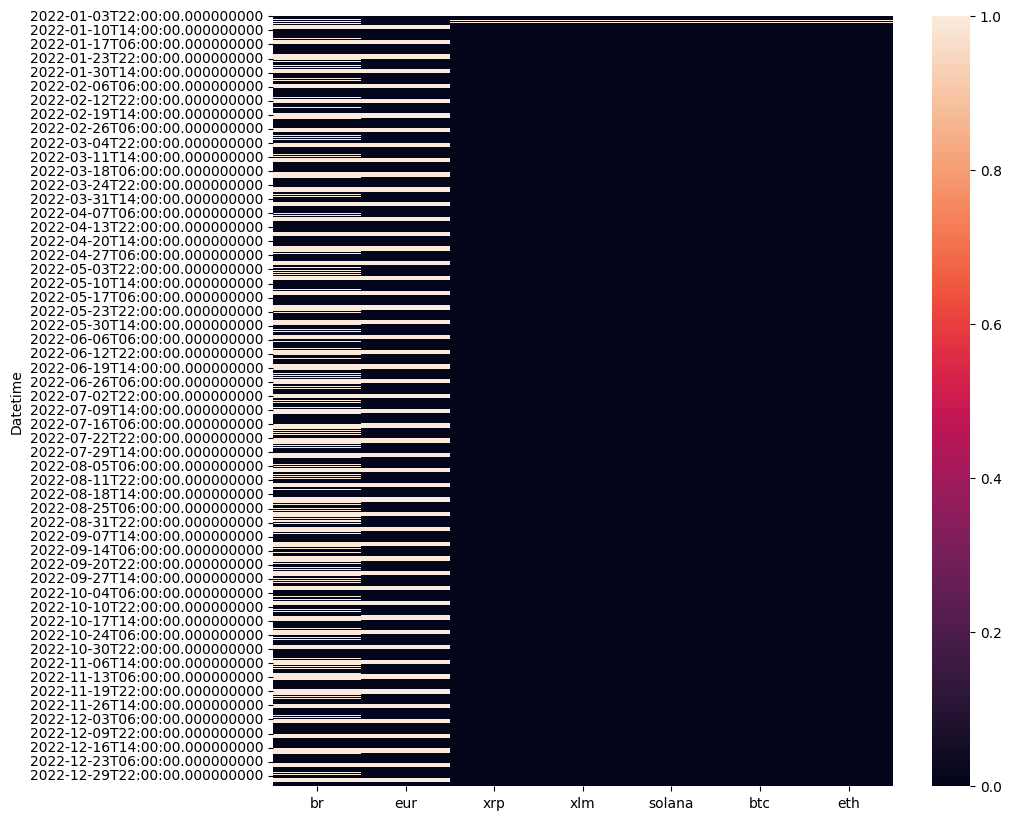

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(master.isna())

In [8]:
# Keep last 2 years
data = master.loc[(master.index.astype('str').str.startswith('2022')) |
                  (master.index.astype('str').str.startswith('2023'))][['xrp', 'xlm', 'solana', 'btc', 'eth']]

In [9]:
# Conversion to 4hrs
data_4h = data[(data.index.astype('str').str.slice(11,13).astype('int') == 1) | (data.index.astype('str').str.slice(11,13).astype('int') == 5)
    | (data.index.astype('str').str.slice(11,13).astype('int') == 9) | (data.index.astype('str').str.slice(11,13).astype('int') == 13) |
    (data.index.astype('str').str.slice(11,13).astype('int') == 17) | (data.index.astype('str').str.slice(11,13).astype('int') == 21)]

In [10]:
stationary = data_4h.pct_change(1)
#stationary = data_4h
series_names = stationary.columns

lag_1 = stationary.shift(1)
lag_2 = stationary.shift(2)
lag_3 = stationary.shift(3)
lag_4 = stationary.shift(4)
lag_5 = stationary.shift(5)
lag_6 = stationary.shift(6)

for i in range(1,7):
    exec(f"lag_{i}.columns = series_names + '_lag{i}'")
    
final = pd.concat([stationary, lag_1, lag_2, lag_3, lag_4, lag_5, lag_6], axis=1)
final.dropna(axis=0, inplace=True)

In [11]:
y = final["xrp"] #
x = final.iloc[:,5:] #past data

In [12]:
final

,xrp,xlm,solana,btc,eth,xrp_lag1,xlm_lag1,solana_lag1,btc_lag1,eth_lag1,...,xrp_lag5,xlm_lag5,solana_lag5,btc_lag5,eth_lag5,xrp_lag6,xlm_lag6,solana_lag6,btc_lag6,eth_lag6
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-05 09:00:00,0.002283,0.033806,0.010357,0.009942,0.006716,0.004378,0.011104,0.008868,0.003158,0.002001,...,0.010570,0.015662,0.023801,0.011988,0.023505,0.002883,0.002135,0.002886,0.004626,0.007296
2022-01-05 13:00:00,-0.006679,-0.007023,-0.013184,-0.008394,-0.006094,0.002283,0.033806,0.010357,0.009942,0.006716,...,-0.007101,-0.001047,-0.004971,-0.004121,-0.001965,0.010570,0.015662,0.023801,0.011988,0.023505
2022-01-05 17:00:00,-0.004389,-0.010778,-0.017694,-0.004475,-0.005727,-0.006679,-0.007023,-0.013184,-0.008394,-0.006094,...,-0.003506,-0.012210,-0.011321,-0.010527,-0.006235,-0.007101,-0.001047,-0.004971,-0.004121,-0.001965
2022-01-05 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004389,-0.010778,-0.017694,-0.004475,-0.005727,...,-0.001809,-0.006630,-0.009259,-0.001141,-0.006284,-0.003506,-0.012210,-0.011321,-0.010527,-0.006235
2022-01-06 01:00:00,-0.064066,-0.088428,-0.078216,-0.057152,-0.069262,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004378,0.011104,0.008868,0.003158,0.002001,-0.001809,-0.006630,-0.009259,-0.001141,-0.006284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 05:00:00,0.009070,0.005079,0.059408,0.002507,0.002963,-0.027161,-0.007788,-0.025726,-0.003796,-0.004520,...,0.041956,0.010518,0.118300,0.004128,0.011917,0.017157,0.014232,0.012629,0.004172,0.005538
2023-01-03 09:00:00,0.001693,0.002345,0.010409,0.002317,0.000986,0.009070,0.005079,0.059408,0.002507,0.002963,...,-0.003734,-0.004890,-0.004977,-0.000987,-0.001301,0.041956,0.010518,0.118300,0.004128,0.011917
2023-01-03 13:00:00,-0.007497,-0.003240,0.013210,-0.001806,-0.001750,0.001693,0.002345,0.010409,0.002317,0.000986,...,0.025657,0.009883,0.004068,0.000899,0.001304,-0.003734,-0.004890,-0.004977,-0.000987,-0.001301


In [13]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import median_absolute_error, make_scorer
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

model = xgb.XGBRegressor(n_jobs=1, tree_method='hist', random_state=0)

def BSCV(K, n_iter, model):
    

    cv = TimeSeriesSplit(gap=0, n_splits=K, test_size=100)
  
    param_grid = {
                #"colsample_bytree": Real(0, 1, prior='uniform'),
                #"colsample_bylevel": Real(0, 1, prior='uniform'),
                #"colsample_bynode": Real(0, 1, prior='uniform'),
                #"reg_lambda": (1e-2, 1e+2, 'log-uniform'),
                #"alpha": (1e-2, 1e+2, 'log-uniform'),
                #"gamma": Real(0, 5, prior='uniform'),
                #"tree_method": ['hist'],
                #"XGBoost__sketch_eps": [0.03],
                #"XGBoost__scale_pos_weight": [cost_weight, cost_weight*3, cost_weight*4],
                #"process_type": ['default'],
                "grow_policy": Categorical(['depthwise', 'lossguide']),
                #"eval_metric": Categorical(['auc', 'logloss']),
                #"max_leaves": Integer(0,5),
                "max_bin": [300],
                "learning_rate": Real(0.2, 0.8, prior='uniform'),
                "max_depth": Integer(9,30), 
                "n_estimators": Integer(50,150), # default 100
                #"subsample": Real(0.9, 1, prior='uniform'),
                "min_child_weight": Integer(10,20),
                "max_delta_step": Integer(1,20)
                }

    search_ddnn = BayesSearchCV(random_state=0, estimator=model, search_spaces=param_grid, 
                        scoring=make_scorer(median_absolute_error, greater_is_better=False), cv=cv, n_jobs=-1, verbose=10,
                        n_iter=n_iter, return_train_score=True,
                        optimizer_kwargs={'base_estimator': 'GP', 'initial_point_generator': 'lhs'},
                        n_points=5, pre_dispatch='1*n_jobs')
    return search_ddnn

res = BSCV(K=10, n_iter=25, model=model).fit(x,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [14]:
import pickle
pickle.dump(res.best_estimator_, open('model0.pkl', 'wb')) #Save trained model
pickled_model = pickle.load(open('model0.pkl', 'rb'))

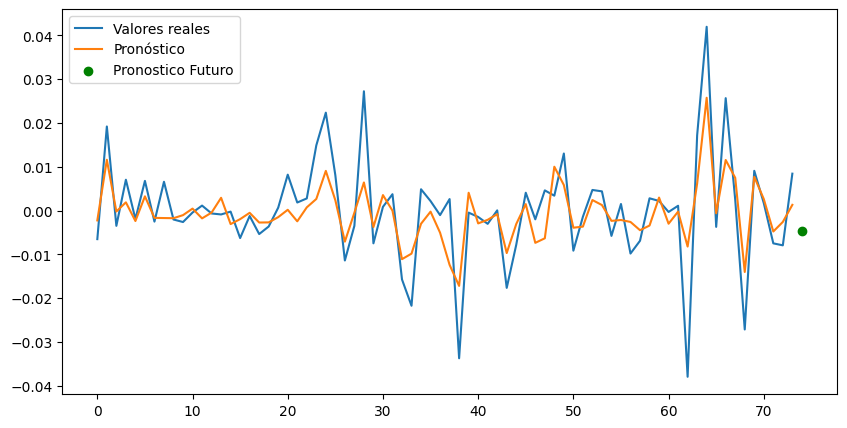

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y.values[-74:], label='Valores reales')
plt.plot(pickled_model.predict(x)[-74:], label='Pronóstico')
plt.scatter(x=74,
            y=pickled_model.predict(pd.concat([final.iloc[-1:,0:5], x.iloc[-1:,0:-5]], axis=1).values),
           color='green', label='Pronostico Futuro')
plt.legend()

<AxesSubplot: xlabel='imp', ylabel='f'>

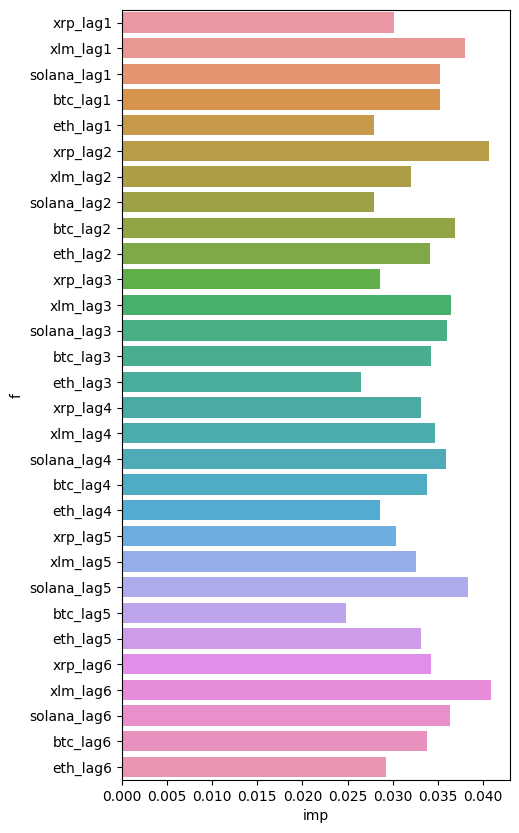

In [16]:
plt.figure(figsize=(5,10))
sns.barplot(y=pd.DataFrame(zip(x.columns.values,pickled_model.feature_importances_), columns=['f', 'imp'])['f'], x=pd.DataFrame(zip(x.columns.values,pickled_model.feature_importances_), columns=['f', 'imp'])['imp'])

In [17]:
print('------------------------------------------------------------------')
print('Forecast serie:', y.name)
print('------------------------------------------------------------------')

print('Actual data:', final.index[-1])

print(data_4h['xrp'].iloc[-1])

print('Past forecast:', (data_4h.iloc[-2:-1,0].values*(1+pickled_model.predict(x.iloc[-1:,:]))).item())

print('------------------------------------------------------------------')
print('Forecast data (4 hours ahead):', pd.Timestamp(data_4h.index[-1].asm8 + int(1.44e13)))

print('Predicted change(%):', np.round(pickled_model.predict(pd.concat([final.iloc[-1:,0:5], x.iloc[-1:,0:-5]], axis=1).values).item()*100,2))
print('------------------------------------------------------------------')

print('4 hours ahead forecast:')
print(data_4h['xrp'].iloc[-1]*(1+pickled_model.predict(pd.concat([final.iloc[-1:,0:5], x.iloc[-1:,0:-5]], axis=1).values)).item())

------------------------------------------------------------------
Forecast serie: xrp
------------------------------------------------------------------
Actual data: 2023-01-03 21:00:00
0.3454328775405884
Past forecast: 0.3429933833418275
------------------------------------------------------------------
Forecast data (4 hours ahead): 2023-01-04 01:00:00
Predicted change(%): -0.47
------------------------------------------------------------------
4 hours ahead forecast:
0.3438126149853957


# Backtesting data 1am timezone yahoo finance

## 2023-01-03 1am/Peru 2022-01-02 8pm (+5Hrs)

<AxesSubplot: xlabel='Datetime'>

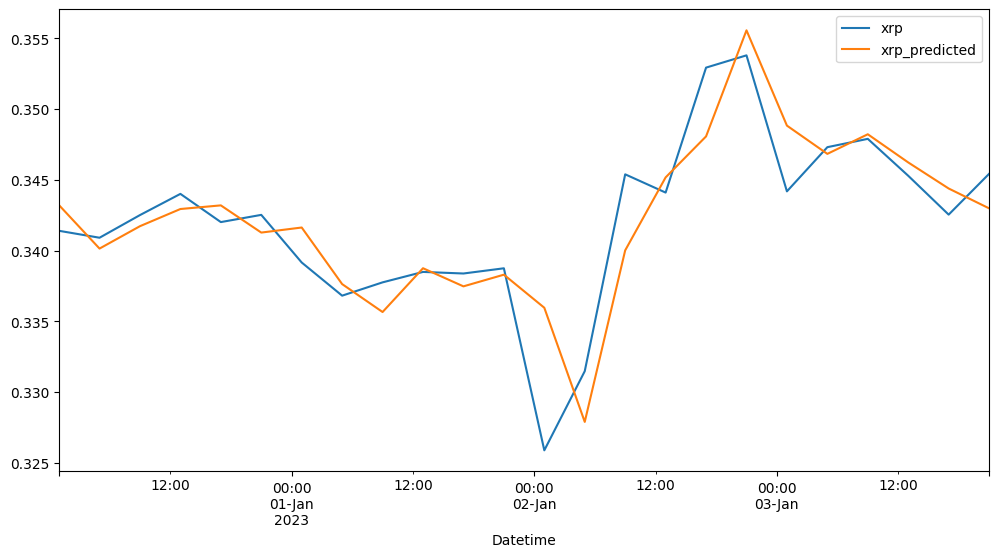

In [18]:
data_4h = data_4h.loc[data_4h.index.intersection(final.index)]
data_4h['xrp_pc']  = pickled_model.predict(x)
data_4h['xrp_predicted'] = data_4h['xrp'].shift(1)*(1+data_4h['xrp_pc'])
data_4h[['xrp', 'xrp_predicted']].iloc[-24:].plot(figsize=(12,6))

In [19]:
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 69.76343965530396 seconds
